In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Answer 1

In [2]:
a = pd.DataFrame({'Max' :[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                  'Min' :[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})

In [3]:
from scipy import optimize
Months = np.arange(12)

In [4]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months,a['Max'], [40,20,0])

res_min, cov_min = optimize.curve_fit(yearly_temps, Months,a['Min'], [-40,20,0])

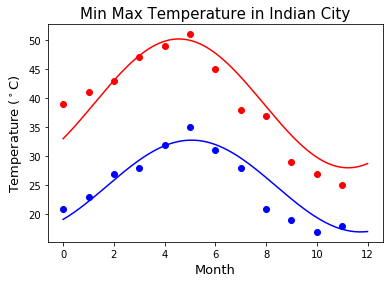

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Months, a['Max'], 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months, a['Min'], 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Temperature ($^\circ$C)',  fontsize=13)
plt.title('Min Max Temperature in Indian City', fontsize=15)
plt.show()

### Answer 2.1

In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


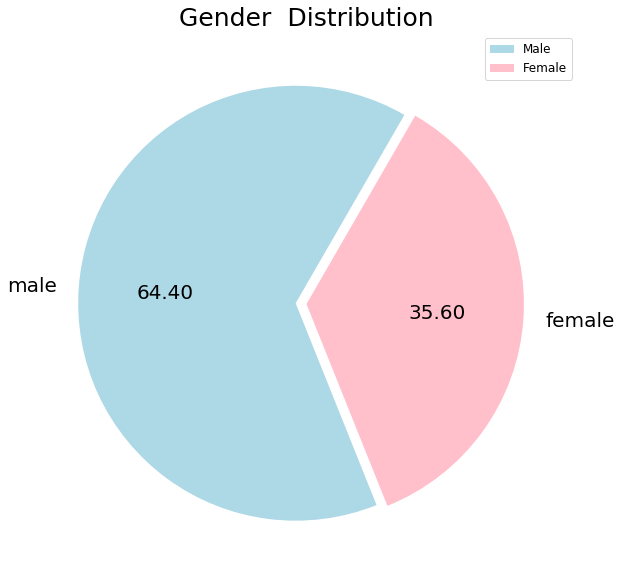

In [7]:
titanic['sex'].value_counts().plot.pie(figsize=(10,10), autopct='%.2f',colors=('lightblue','pink'), fontsize=(20), explode=(0.05,0), startangle=60)
plt.title("Gender  Distribution", fontsize=25)
plt.ylabel("")
plt.legend(labels=['Male','Female'], fontsize =12)

### Answer 2.2

In [8]:
titanic.dropna(subset=['sex'], inplace=True)
gender_dict = {'male':'red', 'female':'blue'}

Text(0.5, 1.0, 'Relationship between Age vs Fair Paid')

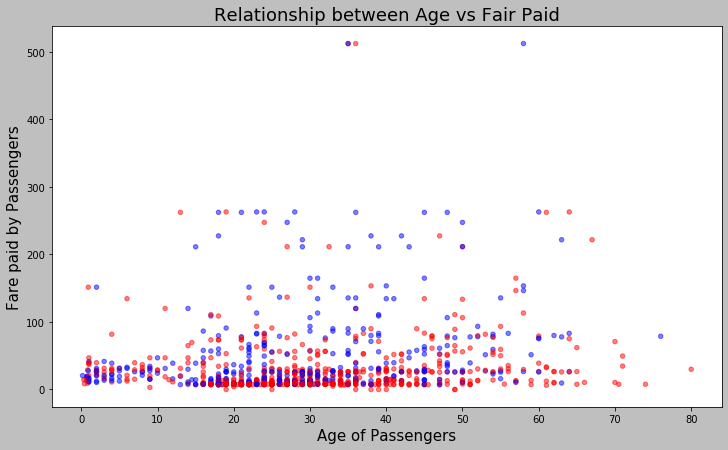

In [9]:
plt.style.use(['grayscale'])
titanic.plot(kind='scatter',x='age',y='fare', c=titanic['sex'].map(gender_dict), figsize=(12,7), alpha=0.5)
plt.xlabel('Age of Passengers', fontsize=15)
plt.ylabel('Fare paid by Passengers', fontsize=15)
plt.title('Relationship between Age vs Fair Paid', fontsize=18)